## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001)  #改為SGD
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
#epochs=500, 
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.2607 - accuracy: 0.1691 - val_loss: 2.2195 - val_accuracy: 0.2002
Epoch 2/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.1931 - accuracy: 0.2262 - val_loss: 2.1659 - val_accuracy: 0.2391
Epoch 3/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.1431 - accuracy: 0.2571 - val_loss: 2.1195 - val_accuracy: 0.2658
Epoch 4/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.0999 - accuracy: 0.2761 - val_loss: 2.0795 - val_accuracy: 0.2765
Epoch 5/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.0622 - accuracy: 0.2891 - val_loss: 2.0442 - val_accuracy: 0.2924
Epoch 6/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.0288 - accuracy: 0.2998 - val_loss: 2.0134 - val_accuracy: 0.2989
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 5s 97us/step - loss: 1.6727 - accuracy: 0.4178 - val_loss: 1.6780 - val_accuracy: 0.4130
Epoch 56/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6697 - accuracy: 0.4189 - val_loss: 1.6746 - val_accuracy: 0.4193
Epoch 57/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.6663 - accuracy: 0.4197 - val_loss: 1.6729 - val_accuracy: 0.4154
Epoch 58/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.6635 - accuracy: 0.4215 - val_loss: 1.6717 - val_accuracy: 0.4143
Epoch 59/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.6605 - accuracy: 0.4227 - val_loss: 1.6653 - val_accuracy: 0.4195
Epoch 60/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.6576 - accuracy: 0.4233 - val_loss: 1.6623 - val_accuracy: 0.4211
Epoch 61/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.6543 - accuracy: 0.4255 - val_los

Epoch 110/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5393 - accuracy: 0.4661 - val_loss: 1.5627 - val_accuracy: 0.4504
Epoch 111/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5372 - accuracy: 0.4667 - val_loss: 1.5588 - val_accuracy: 0.4496
Epoch 112/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5354 - accuracy: 0.4678 - val_loss: 1.5641 - val_accuracy: 0.4482
Epoch 113/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5337 - accuracy: 0.4672 - val_loss: 1.5586 - val_accuracy: 0.4499
Epoch 114/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5316 - accuracy: 0.4684 - val_loss: 1.5548 - val_accuracy: 0.4522
Epoch 115/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.5298 - accuracy: 0.4697 - val_loss: 1.5520 - val_accuracy: 0.4527
Epoch 116/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.5280 - a

Epoch 164/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.4493 - accuracy: 0.4970 - val_loss: 1.4940 - val_accuracy: 0.4717
Epoch 165/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.4477 - accuracy: 0.4962 - val_loss: 1.4983 - val_accuracy: 0.4692
Epoch 166/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.4464 - accuracy: 0.4975 - val_loss: 1.4957 - val_accuracy: 0.4716
Epoch 167/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.4451 - accuracy: 0.4977 - val_loss: 1.4884 - val_accuracy: 0.4736
Epoch 168/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.4436 - accuracy: 0.4992 - val_loss: 1.4919 - val_accuracy: 0.4705
Epoch 169/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.4417 - accuracy: 0.4994 - val_loss: 1.4875 - val_accuracy: 0.4736
Epoch 170/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.44

50000/50000 [==============================] - 13s 260us/step - loss: 1.3755 - accuracy: 0.5227 - val_loss: 1.4498 - val_accuracy: 0.4869
Epoch 218/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.3740 - accuracy: 0.5231 - val_loss: 1.4508 - val_accuracy: 0.4856
Epoch 219/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.3729 - accuracy: 0.5233 - val_loss: 1.4444 - val_accuracy: 0.4884
Epoch 220/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.3710 - accuracy: 0.5239 - val_loss: 1.4420 - val_accuracy: 0.4911
Epoch 221/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.3698 - accuracy: 0.5244 - val_loss: 1.4451 - val_accuracy: 0.4868
Epoch 222/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.3685 - accuracy: 0.5240 - val_loss: 1.4422 - val_accuracy: 0.4900uracy: 0.52
Epoch 223/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.3674 

50000/50000 [==============================] - 13s 260us/step - loss: 1.3081 - accuracy: 0.5456 - val_loss: 1.4087 - val_accuracy: 0.5001
Epoch 271/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.3070 - accuracy: 0.5455 - val_loss: 1.4059 - val_accuracy: 0.4990
Epoch 272/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.3056 - accuracy: 0.5457 - val_loss: 1.4150 - val_accuracy: 0.4966
Epoch 273/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.3046 - accuracy: 0.5469 - val_loss: 1.4082 - val_accuracy: 0.4984
Epoch 274/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.3031 - accuracy: 0.5473 - val_loss: 1.4137 - val_accuracy: 0.4999
Epoch 275/500
50000/50000 [==============================] - 13s 263us/step - loss: 1.3025 - accuracy: 0.5474 - val_loss: 1.4073 - val_accuracy: 0.5007
Epoch 276/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.3005 - accuracy:

Epoch 324/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.2447 - accuracy: 0.5673 - val_loss: 1.3959 - val_accuracy: 0.5077
Epoch 325/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.2433 - accuracy: 0.5683 - val_loss: 1.3891 - val_accuracy: 0.5092
Epoch 326/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.2422 - accuracy: 0.5690 - val_loss: 1.3903 - val_accuracy: 0.4991
Epoch 327/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.2412 - accuracy: 0.5695 - val_loss: 1.3886 - val_accuracy: 0.5021
Epoch 328/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.2400 - accuracy: 0.5696 - val_loss: 1.4008 - val_accuracy: 0.4980
Epoch 329/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.2394 - accuracy: 0.5687 - val_loss: 1.3853 - val_accuracy: 0.5084
Epoch 330/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.23

50000/50000 [==============================] - 13s 252us/step - loss: 1.1855 - accuracy: 0.5879 - val_loss: 1.3628 - val_accuracy: 0.5179
Epoch 378/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.1849 - accuracy: 0.5884 - val_loss: 1.3644 - val_accuracy: 0.5158
Epoch 379/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.1836 - accuracy: 0.5890 - val_loss: 1.3626 - val_accuracy: 0.5200
Epoch 380/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.1825 - accuracy: 0.5905 - val_loss: 1.3801 - val_accuracy: 0.5169
Epoch 381/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.1807 - accuracy: 0.5896 - val_loss: 1.3881 - val_accuracy: 0.5081
Epoch 382/500
50000/50000 [==============================] - 13s 263us/step - loss: 1.1801 - accuracy: 0.5904 - val_loss: 1.3696 - val_accuracy: 0.5092
Epoch 383/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.1771 - accuracy:

Epoch 431/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.1265 - accuracy: 0.6105 - val_loss: 1.3412 - val_accuracy: 0.5243
Epoch 432/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.1258 - accuracy: 0.6100 - val_loss: 1.3652 - val_accuracy: 0.5152
Epoch 433/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.1268 - accuracy: 0.6107 - val_loss: 1.3414 - val_accuracy: 0.5295
Epoch 434/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.1235 - accuracy: 0.6102 - val_loss: 1.3452 - val_accuracy: 0.5261
Epoch 435/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.1233 - accuracy: 0.6086 - val_loss: 1.3840 - val_accuracy: 0.5153
Epoch 436/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.1220 - accuracy: 0.6118 - val_loss: 1.3416 - val_accuracy: 0.5266
Epoch 437/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.12

50000/50000 [==============================] - 13s 263us/step - loss: 1.0702 - accuracy: 0.6301 - val_loss: 1.3547 - val_accuracy: 0.5205
Epoch 485/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.0697 - accuracy: 0.6286 - val_loss: 1.3635 - val_accuracy: 0.5258
Epoch 486/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.0682 - accuracy: 0.6304 - val_loss: 1.3464 - val_accuracy: 0.5279
Epoch 487/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.0689 - accuracy: 0.6293 - val_loss: 1.3622 - val_accuracy: 0.5280
Epoch 488/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.0681 - accuracy: 0.6309 - val_loss: 1.3539 - val_accuracy: 0.5258
Epoch 489/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.0679 - accuracy: 0.6306 - val_loss: 1.3404 - val_accuracy: 0.5307
Epoch 490/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.0646 - accuracy:

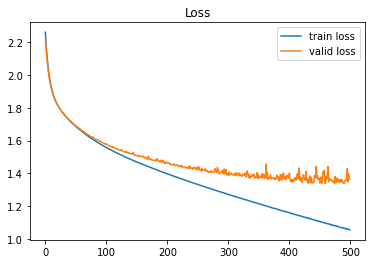

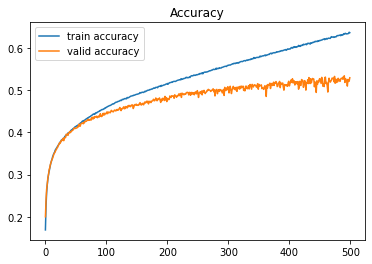

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()